In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [10]:
#load dataset
epl_df = pd.read_csv('2021-22_EPL_PlayerStats.csv')

epl_df.head()

,Unnamed: 0,Rk,Player,Pos,MP,Starts,Min,90s,Gls,Ast,...,AttPenTouch,SuccDrib,AtmpDrib,Nutnegs,Carries,TotDistCarry,PrgDistCarry,CarryAtt3rd,Carry18Yd,CarryDIsp
0,0,1,Max Aarons,DF,18,18,1620,18.0,0,1,...,16,25,53,4,647,3836,2370,34,7,20
1,1,2,Che Adams,FW,13,11,868,9.6,3,1,...,44,4,12,0,202,796,369,6,3,20
2,2,3,Rayan Aït Nouri,DF,9,8,718,8.0,0,1,...,18,17,31,2,343,1681,1100,8,7,17
3,3,4,Kristoffer Ajer,DF,7,6,565,6.3,0,0,...,9,4,6,0,126,774,452,5,0,2
4,4,5,Nathan Aké,DF,8,6,581,6.5,1,0,...,3,0,2,0,402,2084,1406,9,0,1


In [11]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 87 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    544 non-null    int64  
 1   Rk            544 non-null    int64  
 2   Player        544 non-null    object 
 3   Pos           544 non-null    object 
 4   MP            544 non-null    int64  
 5   Starts        544 non-null    int64  
 6   Min           544 non-null    int64  
 7   90s           544 non-null    float64
 8   Gls           544 non-null    int64  
 9   Ast           544 non-null    int64  
 10  NPG           544 non-null    int64  
 11  PG            544 non-null    int64  
 12  PA_x          544 non-null    int64  
 13  YC            544 non-null    int64  
 14  RC            544 non-null    int64  
 15  Gls/90        544 non-null    float64
 16  Ast/90        544 non-null    float64
 17  G+A/90        544 non-null    float64
 18  xG            544 non-null    

In [12]:
#rename columns
epl_df = epl_df.rename(columns={'Pos':'Position','MP':'Matches Played','Min':'Minutes','Gls':'Goals','Ast':'Assists','NPG':'non-penalty goals','PG':'penalty goals','PA_x':'Penalties attempted','SCA':'Shot creating actions','SCPass':'Shot creating pass','TCP':'Total completed passes','PA_y':'Passes attempted','KeyP':'key passes','YC':'yellow card','RC':'red card','Min':'minutes','90s':'Min90s','GCA':'Goal creating actions','GCPass':'Goal creating passes','GCDrib':'Goal creating dribbles','PossTkl':'Possession winning tackles','TSPC':'Total short passes completed','SPA':'Total short passes attempted','TMPC':'Total medium passes completed','MPA':'Total medium passes attempted','TLPC':'Total long passes completed','LPA':'Total long passes attempted','ProgPass':'Total progressive passes','Live':'live ball passes','Dead':'dead ball passes','LeftP':'Left foot passes','RightP':'RIght foot passes','Nutnegs':'nutmegs','Carries':'Number of times player controlled the ball with their feet','TotDistCarry':'Total distance moved while controlling the ball','PrgDistCarry':'Total distance moved towards opposition`s while controlling the ball','CarryDIsp':'Number of times a player lost control of the ball after being tackled'})

In [13]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 87 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Unnamed: 0                                                             544 non-null    int64  
 1   Rk                                                                     544 non-null    int64  
 2   Player                                                                 544 non-null    object 
 3   Position                                                               544 non-null    object 
 4   Matches Played                                                         544 non-null    int64  
 5   Starts                                                                 544 non-null    int64  
 6   minutes                                                                544 non-null    int

In [14]:
#drop unnecessary columns
epl_df = epl_df.drop(columns=['Unnamed: 0','Rk','G+A/90','xG','npxG','xA','npxG+xA','xG/90','xA/90','xG+xA/90','npxG/90','npxG+xA/90'])

In [15]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 75 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Player                                                                 544 non-null    object 
 1   Position                                                               544 non-null    object 
 2   Matches Played                                                         544 non-null    int64  
 3   Starts                                                                 544 non-null    int64  
 4   minutes                                                                544 non-null    int64  
 5   Min90s                                                                 544 non-null    float64
 6   Goals                                                                  544 non-null    int

In [16]:
#check null data
epl_df.isna().sum()

Player                                                                   0
Position                                                                 0
Matches Played                                                           0
Starts                                                                   0
minutes                                                                  0
                                                                        ..
Total distance moved while controlling the ball                          0
Total distance moved towards opposition`s while controlling the ball     0
CarryAtt3rd                                                              0
Carry18Yd                                                                0
Number of times a player lost control of the ball after being tackled    0
Length: 75, dtype: int64

In [27]:
# Top 5 Tops Scorer in season 2021/2022

topscorer = epl_df[['Player','Goals']].sort_values(by='Goals',ascending=False,)[0:5]
topscorer

,Player,Goals
439,Mohamed Salah,16
269,Diogo Jota,10
511,Jamie Vardy,9
98,Emmanuel Dennis,8
467,Emile Smith Rowe,8


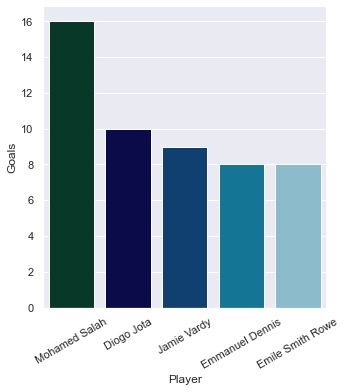

In [63]:
# creating the bar plot
sns.catplot(x='Player',y='Goals',data=topscorer,kind='bar',palette='ocean')
  
plt.xlabel("Player")
plt.xticks(rotation=30)
plt.ylabel("Goals")
plt.show()

In [61]:
# Top 5 Tops Assist in season 2021/2022

topassist = epl_df[['Player','Assists']].sort_values(by='Assists',ascending=False,)[0:5]
topassist

,Player,Assists
7,Trent Alexander-Arnold,9
439,Mohamed Salah,9
401,Paul Pogba,7
46,Jarrod Bowen,7
262,Gabriel Jesus,7


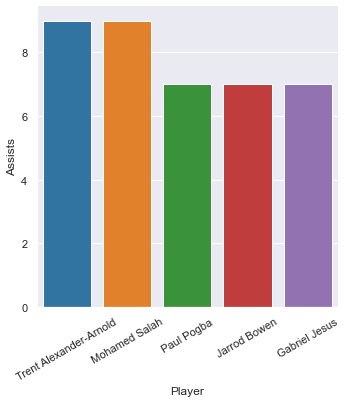

In [64]:
# creating the bar plot
sns.catplot(x='Player',y='Assists',data=topassist,kind='bar',palette='tab10')
  
plt.xlabel("Player")
plt.xticks(rotation=30)
plt.ylabel("Assists")
plt.show()